In [122]:
import pandas as pd
import os 
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [107]:
!pip install plotly

In [108]:
import pandas as pd
import plotly.graph_objects as go

## Fetch Data

In [109]:
txtfiles = []
for file in glob.glob("D:/crawler/crawler/Tweets/final/*"):
    txtfiles.append(file)
arr = next(os.walk('D:/crawler/crawler/Tweets/final/'))[2]

In [6]:
len(arr)

9776

In [110]:
df = pd.DataFrame(columns=['tweetid'])
for filename in glob.glob("D:/crawler/crawler/Tweets/final/*"):
  csv = pd.read_csv(filename) 
  csv['tweetid'] = filename.split('/')[4]
  df = df.append(csv)

In [145]:
df.columns = ['id_str', 'likeduser']

In [151]:
df['id_str'] = df['id_str'].str.replace("\\",'')

<ipython-input-151-bc2d98a3034f>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [153]:
df['id_str'] = df['id_str'].str.replace("final",'')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196295 entries, 0 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id_str     196295 non-null  object
 1   likeduser  196295 non-null  object
dtypes: object(2)
memory usage: 4.5+ MB


In [155]:
df

,id_str,likeduser
0,1344795503251357700,@d_royalti
1,1344795503251357700,@dahliaratchett
2,1344795503251357700,@1coolwhipp
3,1344795503251357700,@catheri40650110
4,1344795503251357700,@nefelibatasays
...,...,...
2,1386351738127585288,@heipsansaa
0,1386368132470788102,@Barbara72346664
1,1386368132470788102,@greybalance1
2,1386368132470788102,@Ral314


In [ ]:
df["id_str"] = pd.to_numeric(df["id_str"])

In [161]:
test = df['likeduser'].value_counts()

In [116]:
## Top 50 Users

In [137]:
df_value_counts = test.reset_index()
df_value_counts.columns = ['unique_values', 'counts']

In [138]:
df_value_counts

,unique_values,counts
0,@Melinda15199317,939
1,@dahliaratchett,860
2,@Aishacat5,849
3,@bluecro90230758,760
4,@la77465262,718
...,...,...
56629,@oscara1515,1
56630,@IEatTabloids,1
56631,@PsychedaliaM,1
56632,@mary_fagan,1


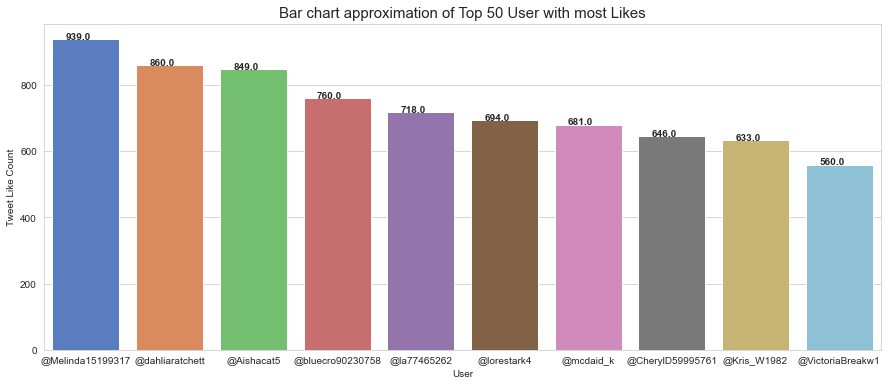

In [135]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=df_value_counts['unique_values'][0:10], y=df_value_counts['counts'][0:10], data=df_value_counts, ci=None, palette="muted",orient='v', )
ax.set_title("Bar chart approximation of Top 10 User with most Likes", fontsize=15)
ax.set_xlabel ("User")
ax.set_ylabel ("Tweet Like Count")
for rect in ax.patches:
    ax.text (rect.get_x()  + rect.get_width() /5,rect.get_height(),"%.1f"% rect.get_height(), weight='bold' )
bar.savefig("Tweet10.png");

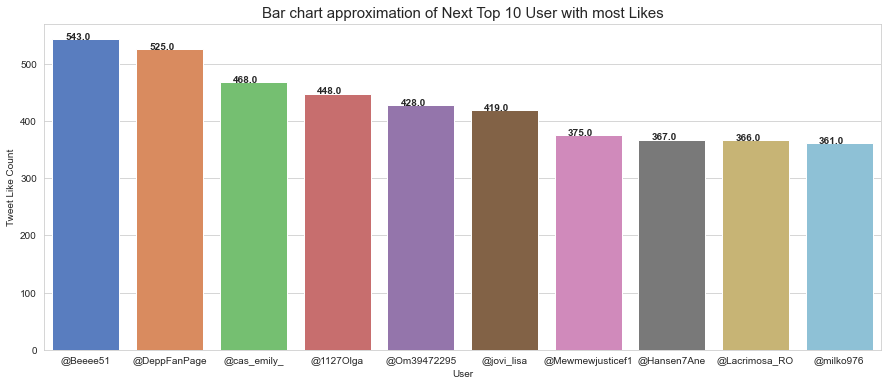

In [136]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(x=df_value_counts['unique_values'][10:20], y=df_value_counts['counts'][10:20], data=df_value_counts, ci=None, palette="muted",orient='v', )
ax.set_title("Bar chart approximation of Next Top 10 User with most Likes", fontsize=15)
ax.set_xlabel ("User")
ax.set_ylabel ("Tweet Like Count")
for rect in ax.patches:
    ax.text (rect.get_x()  + rect.get_width() /5,rect.get_height(),"%.1f"% rect.get_height(), weight='bold' )
bar.savefig("Tweet20.png");

## Load Tweets Data Full

In [ ]:
df1 = pd.read_csv('C:/Users/USER PC/Downloads/twitter/_Twitter - Data/tweets_2021.csv',low_memory=False) 

In [156]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228687 entries, 0 to 228686
Data columns (total 39 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   id_str                                   228687 non-null  object 
 1   created_at                               228687 non-null  object 
 2   full_text                                228687 non-null  object 
 3   lang                                     228686 non-null  object 
 4   in_reply_to_status_id_str                75799 non-null   object 
 5   in_reply_to_user_id                      78962 non-null   object 
 6   entities.hashtags                        228687 non-null  object 
 7   entities.media                           45451 non-null   object 
 8   entities.symbols                         228687 non-null  object 
 9   entities.urls                            228687 non-null  object 
 10  entities.user_mentions          

In [157]:
df3 = pd.merge(df, df1, on='id_str')

In [162]:
df3.to_csv('all_tweets.csv')

In [163]:
def splitcsv(filename):
    count = 0
    for i,chunk in enumerate(pd.read_csv(filename, chunksize=50000)):
        count = count + 1
        chunk.to_csv('all_tweets_twitter_chunk{}.csv'.format(i), index=False)
        print(count)

In [165]:
load = 'all_tweets.csv'

In [166]:
splitcsv(load)

1


C:\Users\USER PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning:

Columns (15,16,17,20,21,22,23,24,26,39) have mixed types.Specify dtype option on import or set low_memory=False.



2
3
4
